In [8]:
data <- read.csv("sdg3_sugar_obesity_data.csv")
head(data)

,Country,Sugar_Intake_g_per_day,Obesity_Rate_percent
,<chr>,<dbl>,<dbl>
1,Australia,81.3,28.5
2,Brazil,85.7,31.0
3,Canada,42.3,22.7
4,China,53.7,21.5
5,France,94.8,37.5
6,Germany,106.7,37.8


   Country          Sugar_Intake_g_per_day Obesity_Rate_percent
 Length:25          Min.   : 42.30         Min.   :12.40       
 Class :character   1st Qu.: 55.00         1st Qu.:20.60       
 Mode  :character   Median : 81.30         Median :24.90       
                    Mean   : 76.03         Mean   :28.04       
                    3rd Qu.: 94.80         3rd Qu.:37.00       
                    Max.   :117.20         Max.   :45.30       

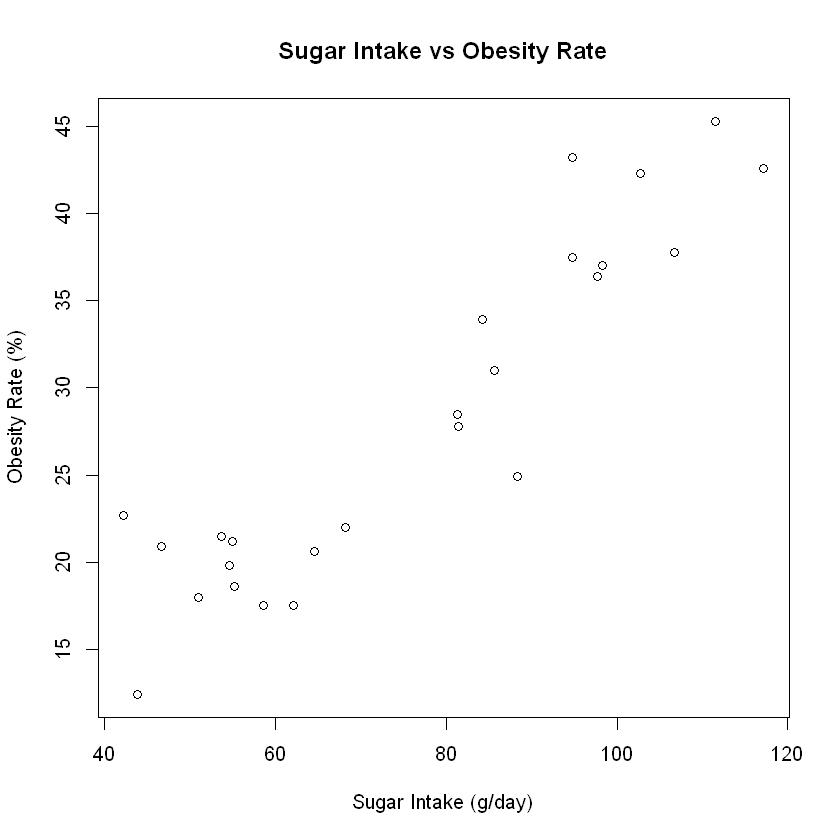

In [9]:
summary(data)
plot(data$Sugar_Intake_g_per_day, data$Obesity_Rate_percent,
     main = "Sugar Intake vs Obesity Rate",
     xlab = "Sugar Intake (g/day)",
     ylab = "Obesity Rate (%)")

In [13]:
# Create groups
avg_sugar <- mean(data$Sugar_Intake_g_per_day)
data$Group <- ifelse(data$Sugar_Intake_g_per_day > avg_sugar, "Above Avg", "Low")

# Run t-test
t.test(Obesity_Rate_percent ~ Group, data = data)


	Welch Two Sample t-test

data:  Obesity_Rate_percent by Group
t = 8.4184, df = 16.684, p-value = 2.084e-07
alternative hypothesis: true difference in means between group Above Avg and group Low is not equal to 0
95 percent confidence interval:
 12.45148 20.79595
sample estimates:
mean in group Above Avg       mean in group Low 
               36.01538                19.39167 


In [14]:
model <- lm(Obesity_Rate_percent ~ Sugar_Intake_g_per_day, data = data)
summary(model)


Call:
lm(formula = Obesity_Rate_percent ~ Sugar_Intake_g_per_day, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9611 -2.3481 -0.1956  2.2429  7.9251 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -1.85648    2.66618  -0.696    0.493    
Sugar_Intake_g_per_day  0.39318    0.03361  11.699 3.66e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.807 on 23 degrees of freedom
Multiple R-squared:  0.8561,	Adjusted R-squared:  0.8499 
F-statistic: 136.9 on 1 and 23 DF,  p-value: 3.664e-11


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?"


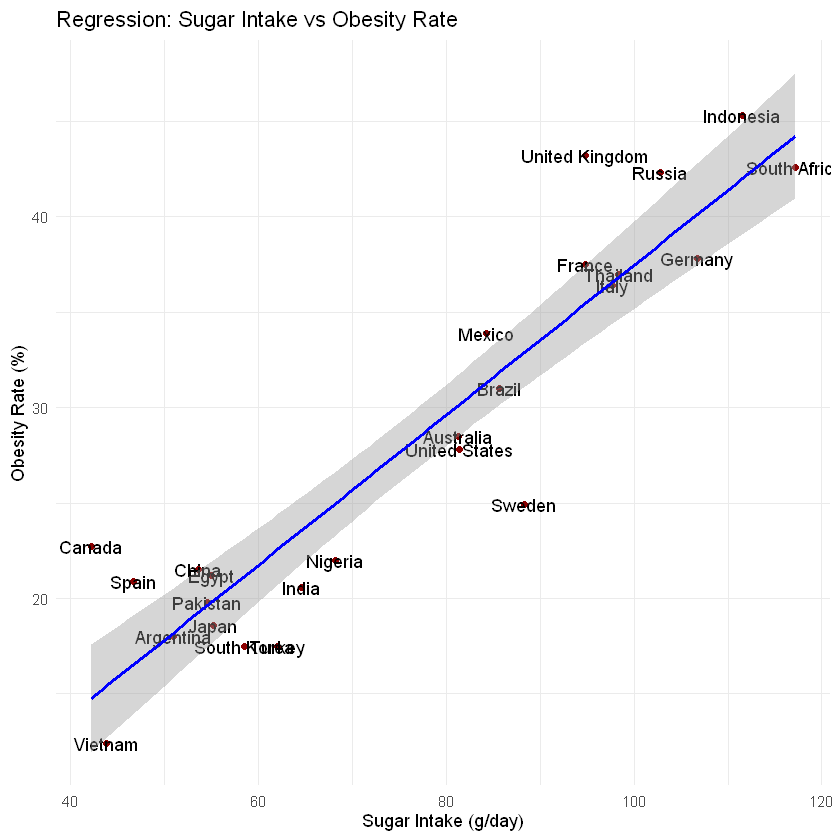

In [16]:
library(ggplot2)

ggplot(data, aes(x = Sugar_Intake_g_per_day, y = Obesity_Rate_percent, label = Country)) +
  geom_point(color = "darkred") +
    geom_text() +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(
    title = "Regression: Sugar Intake vs Obesity Rate",
    x = "Sugar Intake (g/day)",
    y = "Obesity Rate (%)"
  ) +
  theme_minimal()